<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.1. Show a boxplot of the age of the person asking for the credit vs. their credit worthiness for the training data. Is age a good predictor of the credit worthiness?</h3>

In [11]:
credit_train.columns

Index(['Class', 'Duration', 'Amount', 'InstallmentRatePercentage',
       'ResidenceDuration', 'Age', 'NumberExistingCredits',
       'NumberPeopleMaintenance', 'Telephone', 'ForeignWorker',
       'CheckingAccountStatus.lt.0', 'CheckingAccountStatus.0.to.200',
       'CheckingAccountStatus.gt.200', 'CreditHistory.ThisBank.AllPaid',
       'CreditHistory.PaidDuly', 'CreditHistory.Delay',
       'CreditHistory.Critical'],
      dtype='object')

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


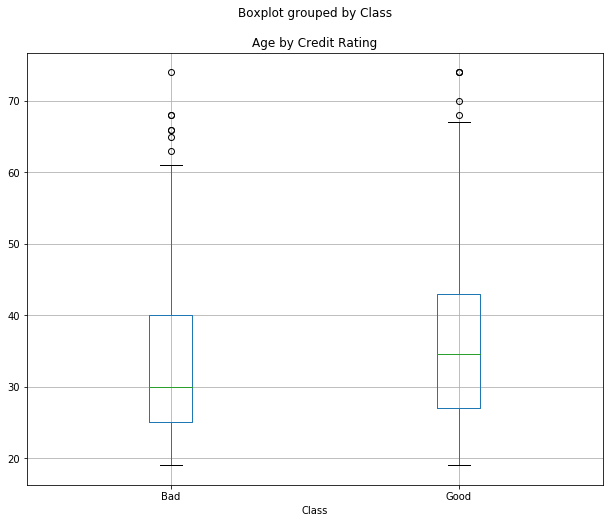

In [31]:
# Put the command (or commands) here that would give an answer to the above question.
fig, ax = plt.subplots(figsize=(10,8))
credit_train.boxplot(column=['Age'],by='Class',ax=ax)
plt.title("Age by Credit Rating")
plt.show()
# Comment whether age is a good predictor
# Age could potentially be a factor, but it doesn't appear to have enough variance between the two groups to be of much use.

<h3>Q.2. Can you generate a table that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [64]:
# Command:
pd.crosstab(credit_train.Class,credit_train['CreditHistory.Critical'])
# One sentence summary:
# Those with bad credit appear to have had critical credit history at twice the rate of those with good credit.
# However, this is not necessarilyt the only indicator of credit worthiness.

CreditHistory.Critical,0,1
Class,,
Bad,208,38
Good,373,189


<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [82]:
cred = {'Good':1, 'Bad':0}
credit_train.Class = [cred[i] for i in credit_train.Class]

<h3>Q.4. Generate a logistic regression model that uses the data. Provide a summary of the model. </h3>

In [83]:
from sklearn.linear_model import LogisticRegression

y = credit_train['Class']
X = credit_train.drop(["Class"],axis=1)

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [84]:
# rename Class text as binary
credit_test.Class = [cred[i] for i in credit_test.Class]

# separate into X and y
y_test = credit_test.Class
X_test = credit_test.drop("Class",axis=1)

In [87]:
# create predictions
preds = log_reg.predict(X_test)

# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
print(confusion_matrix(y_test,preds))

[[ 18  36]
 [ 23 115]]


<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [89]:
# Command that outputs acccuracy
print(accuracy_score(y_test,preds).round(3))

0.693


<h3>Q.7. Generate the ROC curve.</h3>

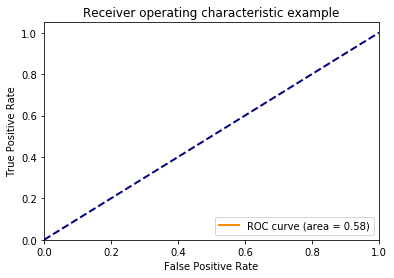

In [115]:
fpr, tpr, thresholds = roc_curve(y_test,preds)
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test,preds))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

In [94]:
# Command(s):
roc_auc_score(y_test,preds).round(3)

0.583

<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda_train_preds = lda.fit(X,y).predict(X)
lda_test_preds = lda.fit(X,y).predict(X_test)

<h3>Q.10. What is the accuracy of the new model?</h3>

In [121]:
print("Accuracy of model on training data: ", accuracy_score(y,lda_train_preds).round(3))
print("Accuracy of model on test data: ", accuracy_score(y_test,lda_test_preds).round(3))

Accuracy of model on training data:  0.776
Accuracy of model on test data:  0.688
